# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [38]:
weather_cities_list = list(zip(cities, lats, lngs))

# Create dataframe to hold weather for city data
weather_df = pd.DataFrame(weather_cities_list)

weather_df.head()

,0,1,2
0,brae,66.128581,-1.869193
1,saint george,31.623494,-56.020648
2,butaritari,3.149720,163.777012
3,te anau,-43.018216,163.139198
4,mys shmidta,77.761644,-172.459882


In [39]:
# Rename first 2 columns
weather_df.rename(columns = {0:'City', 1: 'Latitude', 2: 'Longitude'}, inplace = True)

weather_df.head()

,City,Latitude,Longitude
0,brae,66.128581,-1.869193
1,saint george,31.623494,-56.020648
2,butaritari,3.149720,163.777012
3,te anau,-43.018216,163.139198
4,mys shmidta,77.761644,-172.459882


In [40]:
# Add Columns for Temp, Humidity, Cloudiness, and Windspeed
weather_df['Temp (F)'] = ''
weather_df['Humidity (%)'] = ''
weather_df['Cloudiness (%)'] = ''
weather_df['Wind Speed (mph)'] = ''

weather_df.head()

,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,brae,66.128581,-1.869193,,,,
1,saint george,31.623494,-56.020648,,,,
2,butaritari,3.149720,163.777012,,,,
3,te anau,-43.018216,163.139198,,,,
4,mys shmidta,77.761644,-172.459882,,,,


In [41]:
# Save config information
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

counter = 1
for index, row in weather_df.iterrows():
    
    city = row['City']
    target_url = f"{base_url}appid={api_key}&q={city}&units={units}"
    
    print(f"#{counter} - Getting data for {row['City']}")
    weather_response = requests.get(target_url).json()
    
    # Try getting all for data points for each city... some may contain no data
    try:
        weather_df.loc[index, "Temp (F)"] = weather_response["main"]["temp"]
        weather_df.loc[index,"Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index,"Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index,"Wind Speed (mph)"] = weather_response["wind"]["speed"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

    counter += 1

#1 - Getting data for brae
#2 - Getting data for saint george
#3 - Getting data for butaritari
#4 - Getting data for te anau
#5 - Getting data for mys shmidta
Missing field/result... skipping.
#6 - Getting data for hobyo
#7 - Getting data for chokurdakh
#8 - Getting data for guapo
#9 - Getting data for busselton
#10 - Getting data for carnarvon
#11 - Getting data for yellowknife
#12 - Getting data for mataura
#13 - Getting data for sagua la grande
#14 - Getting data for nizhneyansk
Missing field/result... skipping.
#15 - Getting data for barentsburg
Missing field/result... skipping.
#16 - Getting data for zhuanghe
#17 - Getting data for sibu
#18 - Getting data for newton
#19 - Getting data for gunjur
#20 - Getting data for los llanos de aridane
#21 - Getting data for ponta do sol
#22 - Getting data for qaanaaq
#23 - Getting data for kaitangata
#24 - Getting data for rikitea
#25 - Getting data for kodiak
#26 - Getting data for batemans bay
#27 - Getting data for victoria
#28 - Getting d

#219 - Getting data for krasnoyarsk-66
Missing field/result... skipping.
#220 - Getting data for zaraza
#221 - Getting data for port blair
#222 - Getting data for palmer
#223 - Getting data for slave lake
#224 - Getting data for lagos
#225 - Getting data for walvis bay
#226 - Getting data for esperance
#227 - Getting data for kirakira
#228 - Getting data for ust-tsilma
#229 - Getting data for orzhytsya
#230 - Getting data for ossora
#231 - Getting data for kahului
#232 - Getting data for peniche
#233 - Getting data for port augusta
#234 - Getting data for kudahuvadhoo
#235 - Getting data for chapais
#236 - Getting data for laguna
#237 - Getting data for merrill
#238 - Getting data for plettenberg bay
#239 - Getting data for carutapera
#240 - Getting data for chagda
Missing field/result... skipping.
#241 - Getting data for ottawa
#242 - Getting data for paamiut
#243 - Getting data for norman wells
#244 - Getting data for lasa
#245 - Getting data for arinos
#246 - Getting data for plouza

#447 - Getting data for palabuhanratu
Missing field/result... skipping.
#448 - Getting data for tevaitoa
#449 - Getting data for gzhatsk
Missing field/result... skipping.
#450 - Getting data for bangassou
#451 - Getting data for roma
#452 - Getting data for ipixuna
#453 - Getting data for darhan
#454 - Getting data for zeya
#455 - Getting data for saint-joseph
#456 - Getting data for koyilandi
Missing field/result... skipping.
#457 - Getting data for yenagoa
#458 - Getting data for hnaberd
#459 - Getting data for margate
#460 - Getting data for kushima
#461 - Getting data for krasne
#462 - Getting data for panguna
#463 - Getting data for korla
Missing field/result... skipping.
#464 - Getting data for andenes
Missing field/result... skipping.
#465 - Getting data for tautira
#466 - Getting data for yumen
#467 - Getting data for garowe
#468 - Getting data for san
#469 - Getting data for fatsa
#470 - Getting data for gazanjyk
#471 - Getting data for pachino
#472 - Getting data for haines j

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
weather_df = weather_df[weather_df['Temp (F)'] != '']
weather_df.head()

,City,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,brae,66.128581,-1.869193,46.4,93,100,21.92
1,saint george,31.623494,-56.020648,37.85,54,75,1.43
2,butaritari,3.149720,163.777012,84.61,78,38,15.12
3,te anau,-43.018216,163.139198,47.88,82,100,8.14
5,hobyo,4.814716,49.179728,77.72,81,0,14.45


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
# Save Dataframe to .csv
weather_df.to_csv('Weather_Data.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [45]:
latitude = weather_df['Latitude']
temp = weather_df['Temp (F)']
humidity = weather_df['Humidity (%)']
cloudiness = weather_df['Cloudiness (%)']
windspeed = weather_df['Wind Speed (mph)']

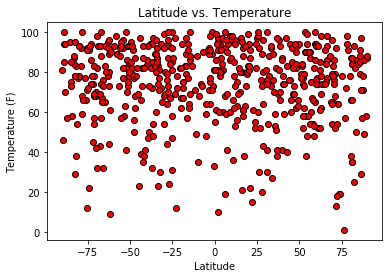

In [49]:
# Latitude vs. Temperature Plot
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.show()

#### Latitude vs. Humidity Plot

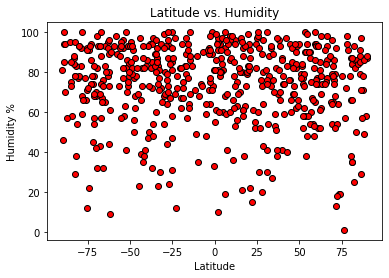

In [50]:
# Latitude vs. Humidity Plot
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

plt.show()

#### Latitude vs. Cloudiness Plot

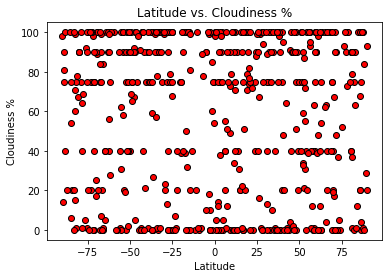

In [47]:
# Latitude vs. Cloudiness
plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudiness %")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.show()

#### Latitude vs. Wind Speed Plot

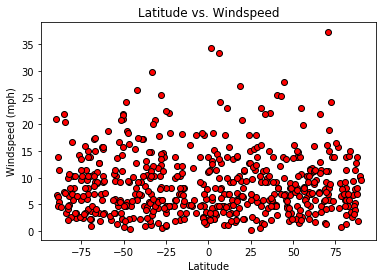

In [48]:
# Latitude vs. Wind Speed
plt.scatter(latitude, windspeed, marker="o", facecolors="red", edgecolors="black")
# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.show()